                                                    PROJECT : Heart Disease

Problem Statement : You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [4]:
data = pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Data Science\Python\Python_projects\Heart Disease Prediction\dataset.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Data Visualization

Visualize the number of patients having a heart disease and not having a heart disease

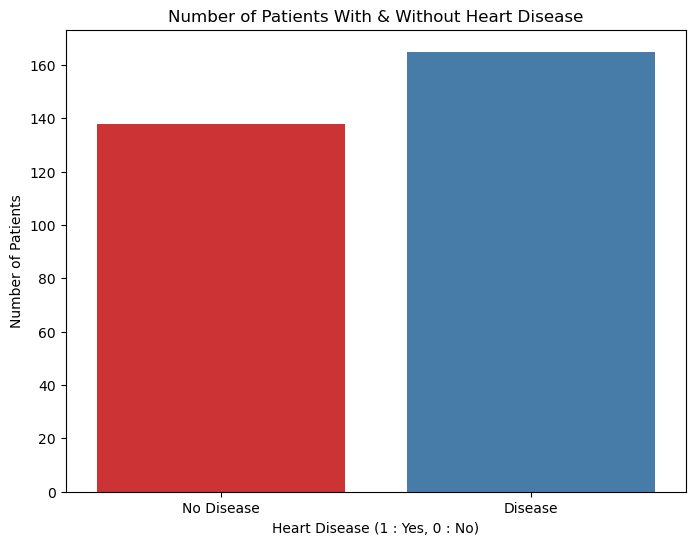

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(x = data['target'], palette = 'Set1')
plt.title('Number of Patients With & Without Heart Disease')
plt.xlabel('Heart Disease (1 : Yes, 0 : No)')
plt.ylabel('Number of Patients')
plt.xticks([1, 0], ['Disease', 'No Disease'])
plt.show()

Visualize the age and whether a patient has disease or not

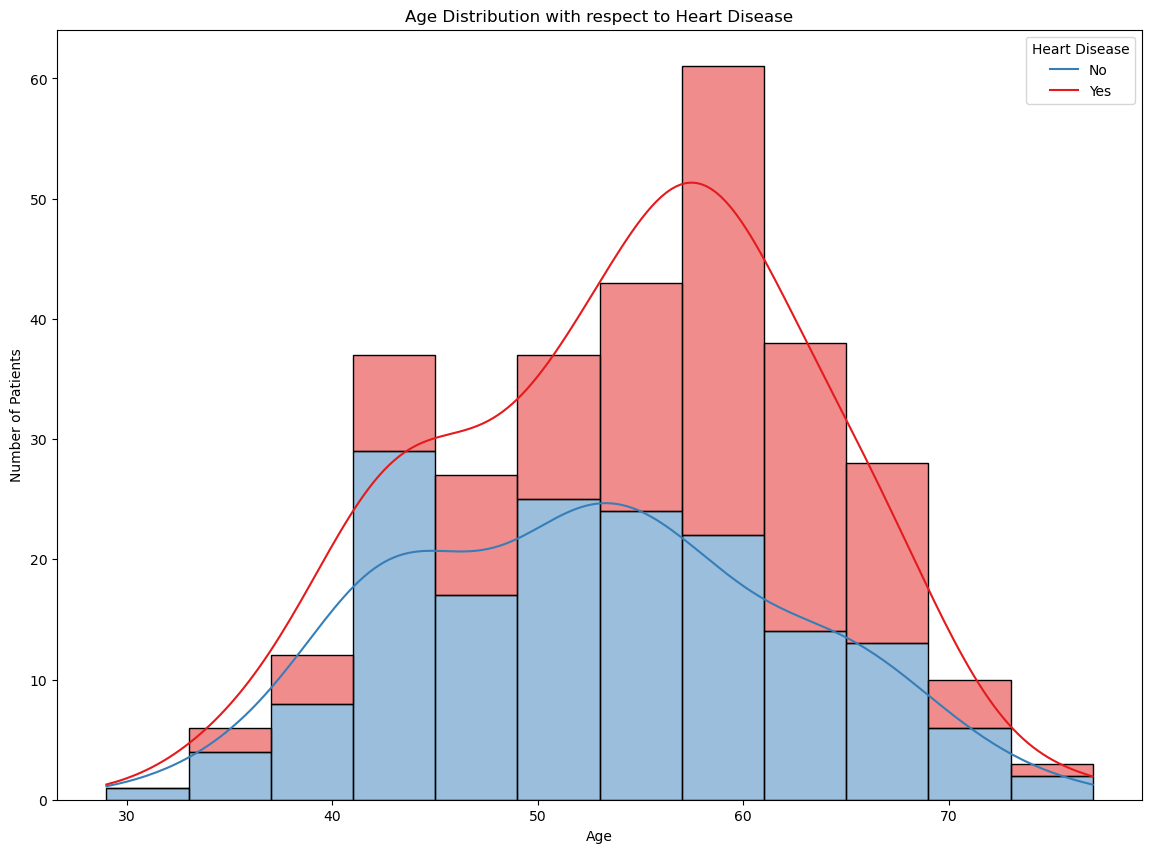

In [14]:
plt.figure(figsize = (14, 10))
sns.histplot(x = data['age'], hue = data['target'], multiple = 'stack', palette = 'Set1', kde = True)
plt.title('Age Distribution with respect to Heart Disease')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title = 'Heart Disease', labels = ['No', 'Yes'])
plt.show()

Visualize correlation between all features using a heat map

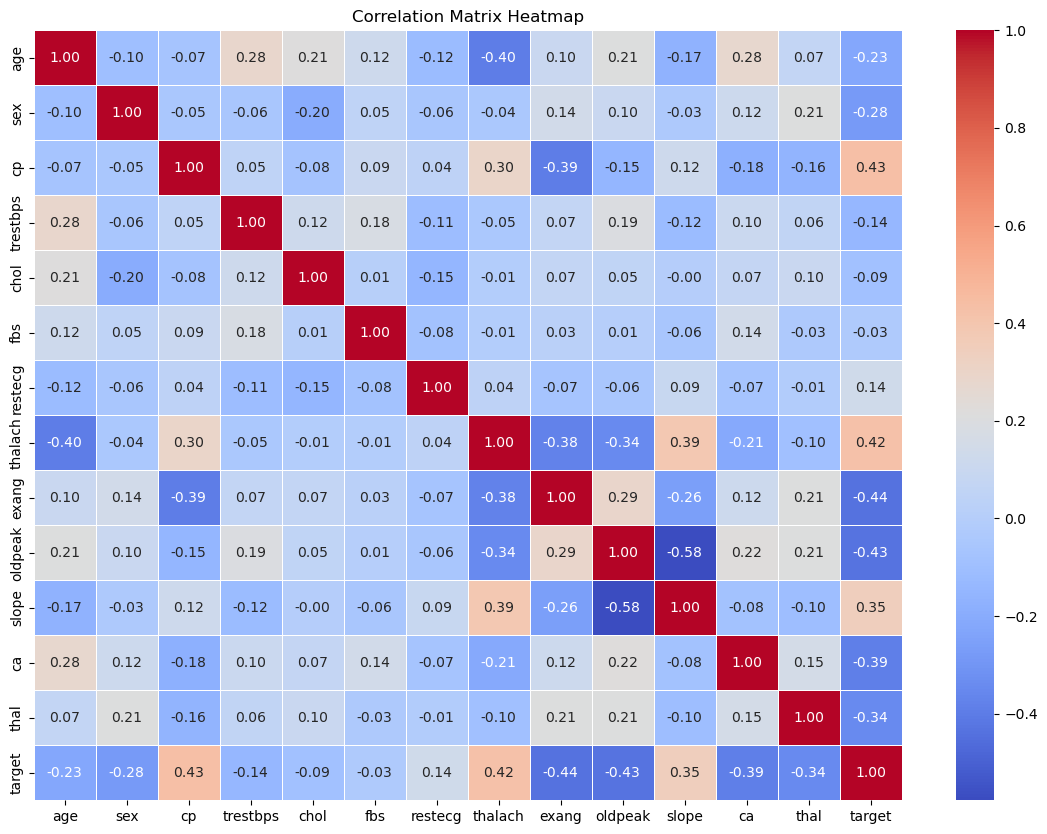

In [16]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Logistic Regression :

In [18]:
X = data.drop(columns = 'target')
Y = data['target']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [20]:
log_reg = LogisticRegression(max_iter = 800)
log_reg.fit(X_train, Y_train)
y_pred_log = log_reg.predict(X_test)

In [21]:
ac_log = accuracy_score(Y_test, y_pred_log)
ac_log

0.8131868131868132

In [22]:
cm_log = confusion_matrix(Y_test, y_pred_log)
cm_log

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [23]:
cr_log = classification_report(Y_test, y_pred_log)
print(cr_log)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Decision Tree

In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

In [27]:
ac_dt = accuracy_score(Y_test, y_pred_dt)
ac_dt

0.7032967032967034

In [28]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)
cm_dt

array([[32,  9],
       [18, 32]], dtype=int64)

In [29]:
cr_dt = classification_report(Y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        41
           1       0.78      0.64      0.70        50

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.70        91



Random Forest

In [31]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

In [32]:
ac_rfc = accuracy_score(Y_test, y_pred_rfc)
ac_rfc

0.8241758241758241

In [33]:
cm_rfc = confusion_matrix(Y_test, y_pred_rfc)
cm_rfc

array([[32,  9],
       [ 7, 43]], dtype=int64)

In [34]:
cr_rfc = classification_report(Y_test, y_pred_rfc)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Select the best model
a. Print the confusion matrix of all classifiers

In [36]:
print('Confusion Matrix of Logistic Regression : ', cm_log)
print('Confusion Matrix of Decision Tree Classifier : ', cm_dt)
print('Confusion Matrix of Random Forest Classifier : ', cm_rfc)

Confusion Matrix of Logistic Regression :  [[32  9]
 [ 8 42]]
Confusion Matrix of Decision Tree Classifier :  [[32  9]
 [18 32]]
Confusion Matrix of Random Forest Classifier :  [[32  9]
 [ 7 43]]


b. Print the classification report of all classifiers

In [38]:
print('Classification Report of Logistic Regression : \n', cr_log)
print('Classification Report of  Decision Tree : \n', cr_dt)
print('Classification Report of  : Random Forest \n', cr_rfc)

Classification Report of Logistic Regression : 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Classification Report of  Decision Tree : 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70        41
           1       0.78      0.64      0.70        50

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.70        91

Classification Report of  : Random Forest 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82  

c. Visualize confusion matrix using heatmaps

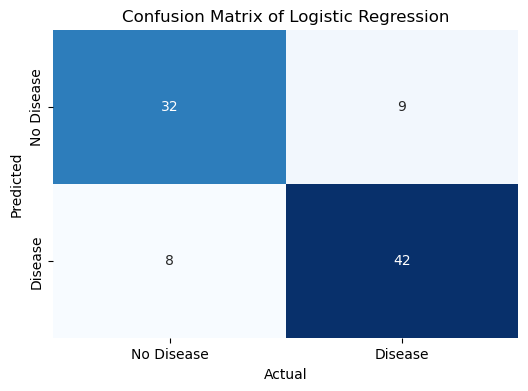

In [40]:
plt.figure(figsize = (6,4))
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['No Disease', 'Disease'], yticklabels = ['No Disease', 'Disease'])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

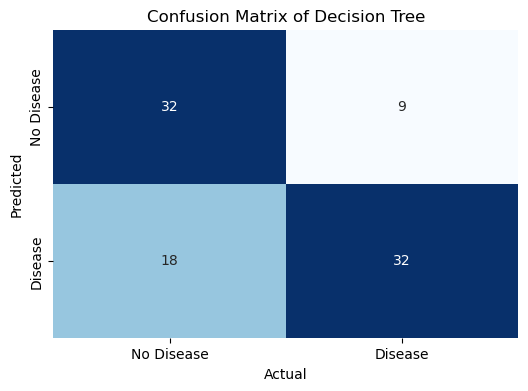

In [41]:
plt.figure(figsize = (6,4))
sns.heatmap(cm_dt, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['No Disease', 'Disease'], yticklabels = ['No Disease', 'Disease'])
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

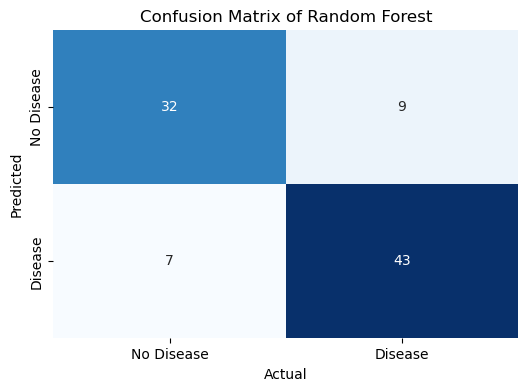

In [42]:
plt.figure(figsize = (6,4))
sns.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['No Disease', 'Disease'], yticklabels = ['No Disease', 'Disease'])
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()